<br><font color='Green' size=5><b><center>EXPLORATORY DATA ANALYSIS</center></b></font><br>
<font color='Green' size=3><b><center>Project: Analysis of different measures taken by different countries to control the spread of Covid-19 virus</center></b></font><br>
<font color='Green' size=3><b>Team Members</b></font><br>
<font color='Green' size=3>Nisha Ramrakhyani (Student Id: 801208678)</font><br>
<font color='Green' size=3>Punit Mashruwala (Student Id: 801208416)</font><br>
<font color='Green' size=3>Zalak Panchal (Student Id: 801196881)</font>

<font color = 'green'><b> Exploratory Data Analysis</b> is a process having a set of techniques for analyzing datasets, performing initial investigations on data to discover patterns, spot errors using graphical representations.<br>The steps involved in Exploratory Data Analysis are-<br>a) Importing and cleaning data and checking for errors and other special conditions. <br>b) Exploring Variables one at a time, visualizing distributions<br>c) Exploring relationships between variables two at a time, using scatter plots and other visualizations<br>d) Exploring multivariate reltionships using multiple regression and logistic regression. <br>We perform Exploratory Data Analysis to use data to answer questions and guide in decision making. <br> We perform Exploratory Data Analysis especially in the early stages of a project, or while working with a new dataset. </font> 


In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from bokeh.io import output_notebook, curdoc
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper, Slider, Column, Select
output_notebook()

Loading BokehJS ...

In [3]:
#Importing datatset
dataset = pd.read_excel('../data/covid_19_data_2.xlsx')
print(dataset.head())

   ID  ISO    COUNTRY   REGION                              LOG_TYPE  \
0  98  AUS  Australia  Pacific  Introduction / extension of measures   
1  96  AUS  Australia  Pacific  Introduction / extension of measures   
2  93  AUS  Australia  Pacific  Introduction / extension of measures   
3  94  AUS  Australia  Pacific  Introduction / extension of measures   
4  97  AUS  Australia  Pacific  Introduction / extension of measures   

                                 CATEGORY  \
0  Governance and socio-economic measures   
1  Governance and socio-economic measures   
2                   Movement restrictions   
3                  Public health measures   
4                  Public health measures   

                                             MEASURE TARGETED_POP_GROUP  \
0  Emergency administrative structures activated ...                NaN   
1                                  Economic measures                NaN   
2                                  Visa restrictions            checked

<font color='Green' size=5>Data Pre-processing</font>

In [4]:
#Selecting features that are important in our analysis
df = dataset[['COUNTRY','CATEGORY', 'MEASURE', 'COMMENTS', 'DATE_IMPLEMENTED', 'covid_case_per_date', 'population']]
print(df.head())

     COUNTRY                                CATEGORY  \
0  Australia  Governance and socio-economic measures   
1  Australia  Governance and socio-economic measures   
2  Australia                   Movement restrictions   
3  Australia                  Public health measures   
4  Australia                  Public health measures   

                                             MEASURE  \
0  Emergency administrative structures activated ...   
1                                  Economic measures   
2                                  Visa restrictions   
3                  Isolation and quarantine policies   
4             Strengthening the public health system   

                                            COMMENTS DATE_IMPLEMENTED  \
0  Australian Health Sector Emergency Plan Activated       2020-02-17   
1  Implementation of an economic response to the ...       2020-03-01   
2  Citizens from China, Italy, South Korea, Iran,...       2020-03-01   
3  14 days self-quarantine, for na

In [12]:
#Converting datatype of column 'DATE_IMPLEMENTED' to datetime
df['DATE_IMPLEMENTED'] =  pd.to_datetime(df['DATE_IMPLEMENTED'])
print(df['DATE_IMPLEMENTED'])

0      2020-02-17
1      2020-03-01
2      2020-03-01
3      2020-03-01
4      2020-03-12
          ...    
4138   2020-11-02
4139   2020-11-02
4140   2020-11-02
4141   2020-11-02
4142   2020-11-02
Name: DATE_IMPLEMENTED, Length: 4107, dtype: datetime64[ns]


In [5]:
print(df.isnull().sum())

COUNTRY                 0
CATEGORY                0
MEASURE                 0
COMMENTS                6
DATE_IMPLEMENTED       26
covid_case_per_date    31
population              0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4143 entries, 0 to 4142
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   COUNTRY              4143 non-null   object        
 1   CATEGORY             4143 non-null   object        
 2   MEASURE              4143 non-null   object        
 3   COMMENTS             4137 non-null   object        
 4   DATE_IMPLEMENTED     4117 non-null   datetime64[ns]
 5   covid_case_per_date  4112 non-null   float64       
 6   population           4143 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 226.7+ KB


In [7]:
df.describe()

,covid_case_per_date,population
count,4112.000000,4.143000e+03
mean,6756.807636,1.223711e+08
std,14039.385920,2.703601e+08
min,0.000000,4.822233e+06
25%,42.000000,2.141325e+07
50%,556.000000,3.774215e+07
75%,4649.000000,6.788601e+07
max,132854.000000,1.380004e+09


In [8]:
sum = df['covid_case_per_date'].sum()
print(sum)

27783993.0


In [9]:
df.isnull().sum()

COUNTRY                 0
CATEGORY                0
MEASURE                 0
COMMENTS                6
DATE_IMPLEMENTED       26
covid_case_per_date    31
population              0
dtype: int64

In [10]:
#Dealing with missing values
df = df[df['DATE_IMPLEMENTED'].notna()]
df.isnull().sum()

COUNTRY                 0
CATEGORY                0
MEASURE                 0
COMMENTS                5
DATE_IMPLEMENTED        0
covid_case_per_date    10
population              0
dtype: int64

In [11]:
#Dealing with missing values
df = df[df['covid_case_per_date'].notna()]
df.isnull().sum()

COUNTRY                0
CATEGORY               0
MEASURE                0
COMMENTS               5
DATE_IMPLEMENTED       0
covid_case_per_date    0
population             0
dtype: int64

In [13]:
#Performing log normalization
df['log_value'] = np.log(df['covid_case_per_date'])
print(df)

        COUNTRY                                CATEGORY  \
0     Australia  Governance and socio-economic measures   
1     Australia  Governance and socio-economic measures   
2     Australia                   Movement restrictions   
3     Australia                  Public health measures   
4     Australia                  Public health measures   
...         ...                                     ...   
4138    Belgium                                Lockdown   
4139    Belgium                       Social distancing   
4140    Belgium                       Social distancing   
4141    Belgium                  Public health measures   
4142    Belgium                  Public health measures   

                                                MEASURE  \
0     Emergency administrative structures activated ...   
1                                     Economic measures   
2                                     Visa restrictions   
3                     Isolation and quarantine policies

C:\Users\nisha\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
country_array = df.COUNTRY.unique()
country_array

array(['Australia', 'France', 'Germany', 'India', 'Italy',
       'United States', 'New Zealand', 'Canada', 'Norway', 'Sweden',
       'United Kingdom', 'Mexico', 'Singapore', 'Spain', 'Sri Lanka',
       'Belgium'], dtype=object)

<font color='Green' size=5>Performing EDA</font>

<font color = 'green'><b>1) What was the number of cases after taking the different measures for each country? </b>  </font> 


In [15]:
# Below graphs show the number of covid cases for each country after each measure was taken to control the pandemic. 
# On Hovering over the graph, we can see the different measures taken in the particular month to control the spread of Covid-19 virus.
for i in range(len(country_array)):
    plt.figure(figsize=(10,5))
    new_df = df[df["COUNTRY"] == country_array[i]]
    new_df = new_df.drop_duplicates(subset=['DATE_IMPLEMENTED'])
    new_df = new_df.sort_values(by="DATE_IMPLEMENTED")
    source = ColumnDataSource(new_df)
    plot = figure(plot_width=300, plot_height=300)  
    source = ColumnDataSource(data=dict(
        x=new_df['DATE_IMPLEMENTED'],
        y=new_df['covid_case_per_date'],
        desc=new_df['MEASURE'],
    ))
    p = figure(title=country_array[i],x_axis_type='datetime', x_axis_label="Cases on given date in : " + country_array[i], y_axis_label='Number of Covid Cases',
           plot_height=400, plot_width=700,
           tools=[HoverTool(tooltips='@desc')],toolbar_location=None)
    p.line('x', 'y', source=source)
    show(p)

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [16]:
for i in range(len(country_array)):
    new_df = df[df["COUNTRY"] == country_array[i]]
    new_df = new_df.drop_duplicates(subset=['DATE_IMPLEMENTED'])
    new_df = new_df.sort_values(by="DATE_IMPLEMENTED")
    if i == 0:
        df0 = new_df
    else:
        df0 = df0.append(new_df)

In [17]:
sum = df0['covid_case_per_date'].sum()
print(sum)

11102926.0


<font color ='Green'><b>2) What was the impact of each measure on the number of Covid-19 cases in the different countries?</b></font>

<Figure size 432x288 with 0 Axes>

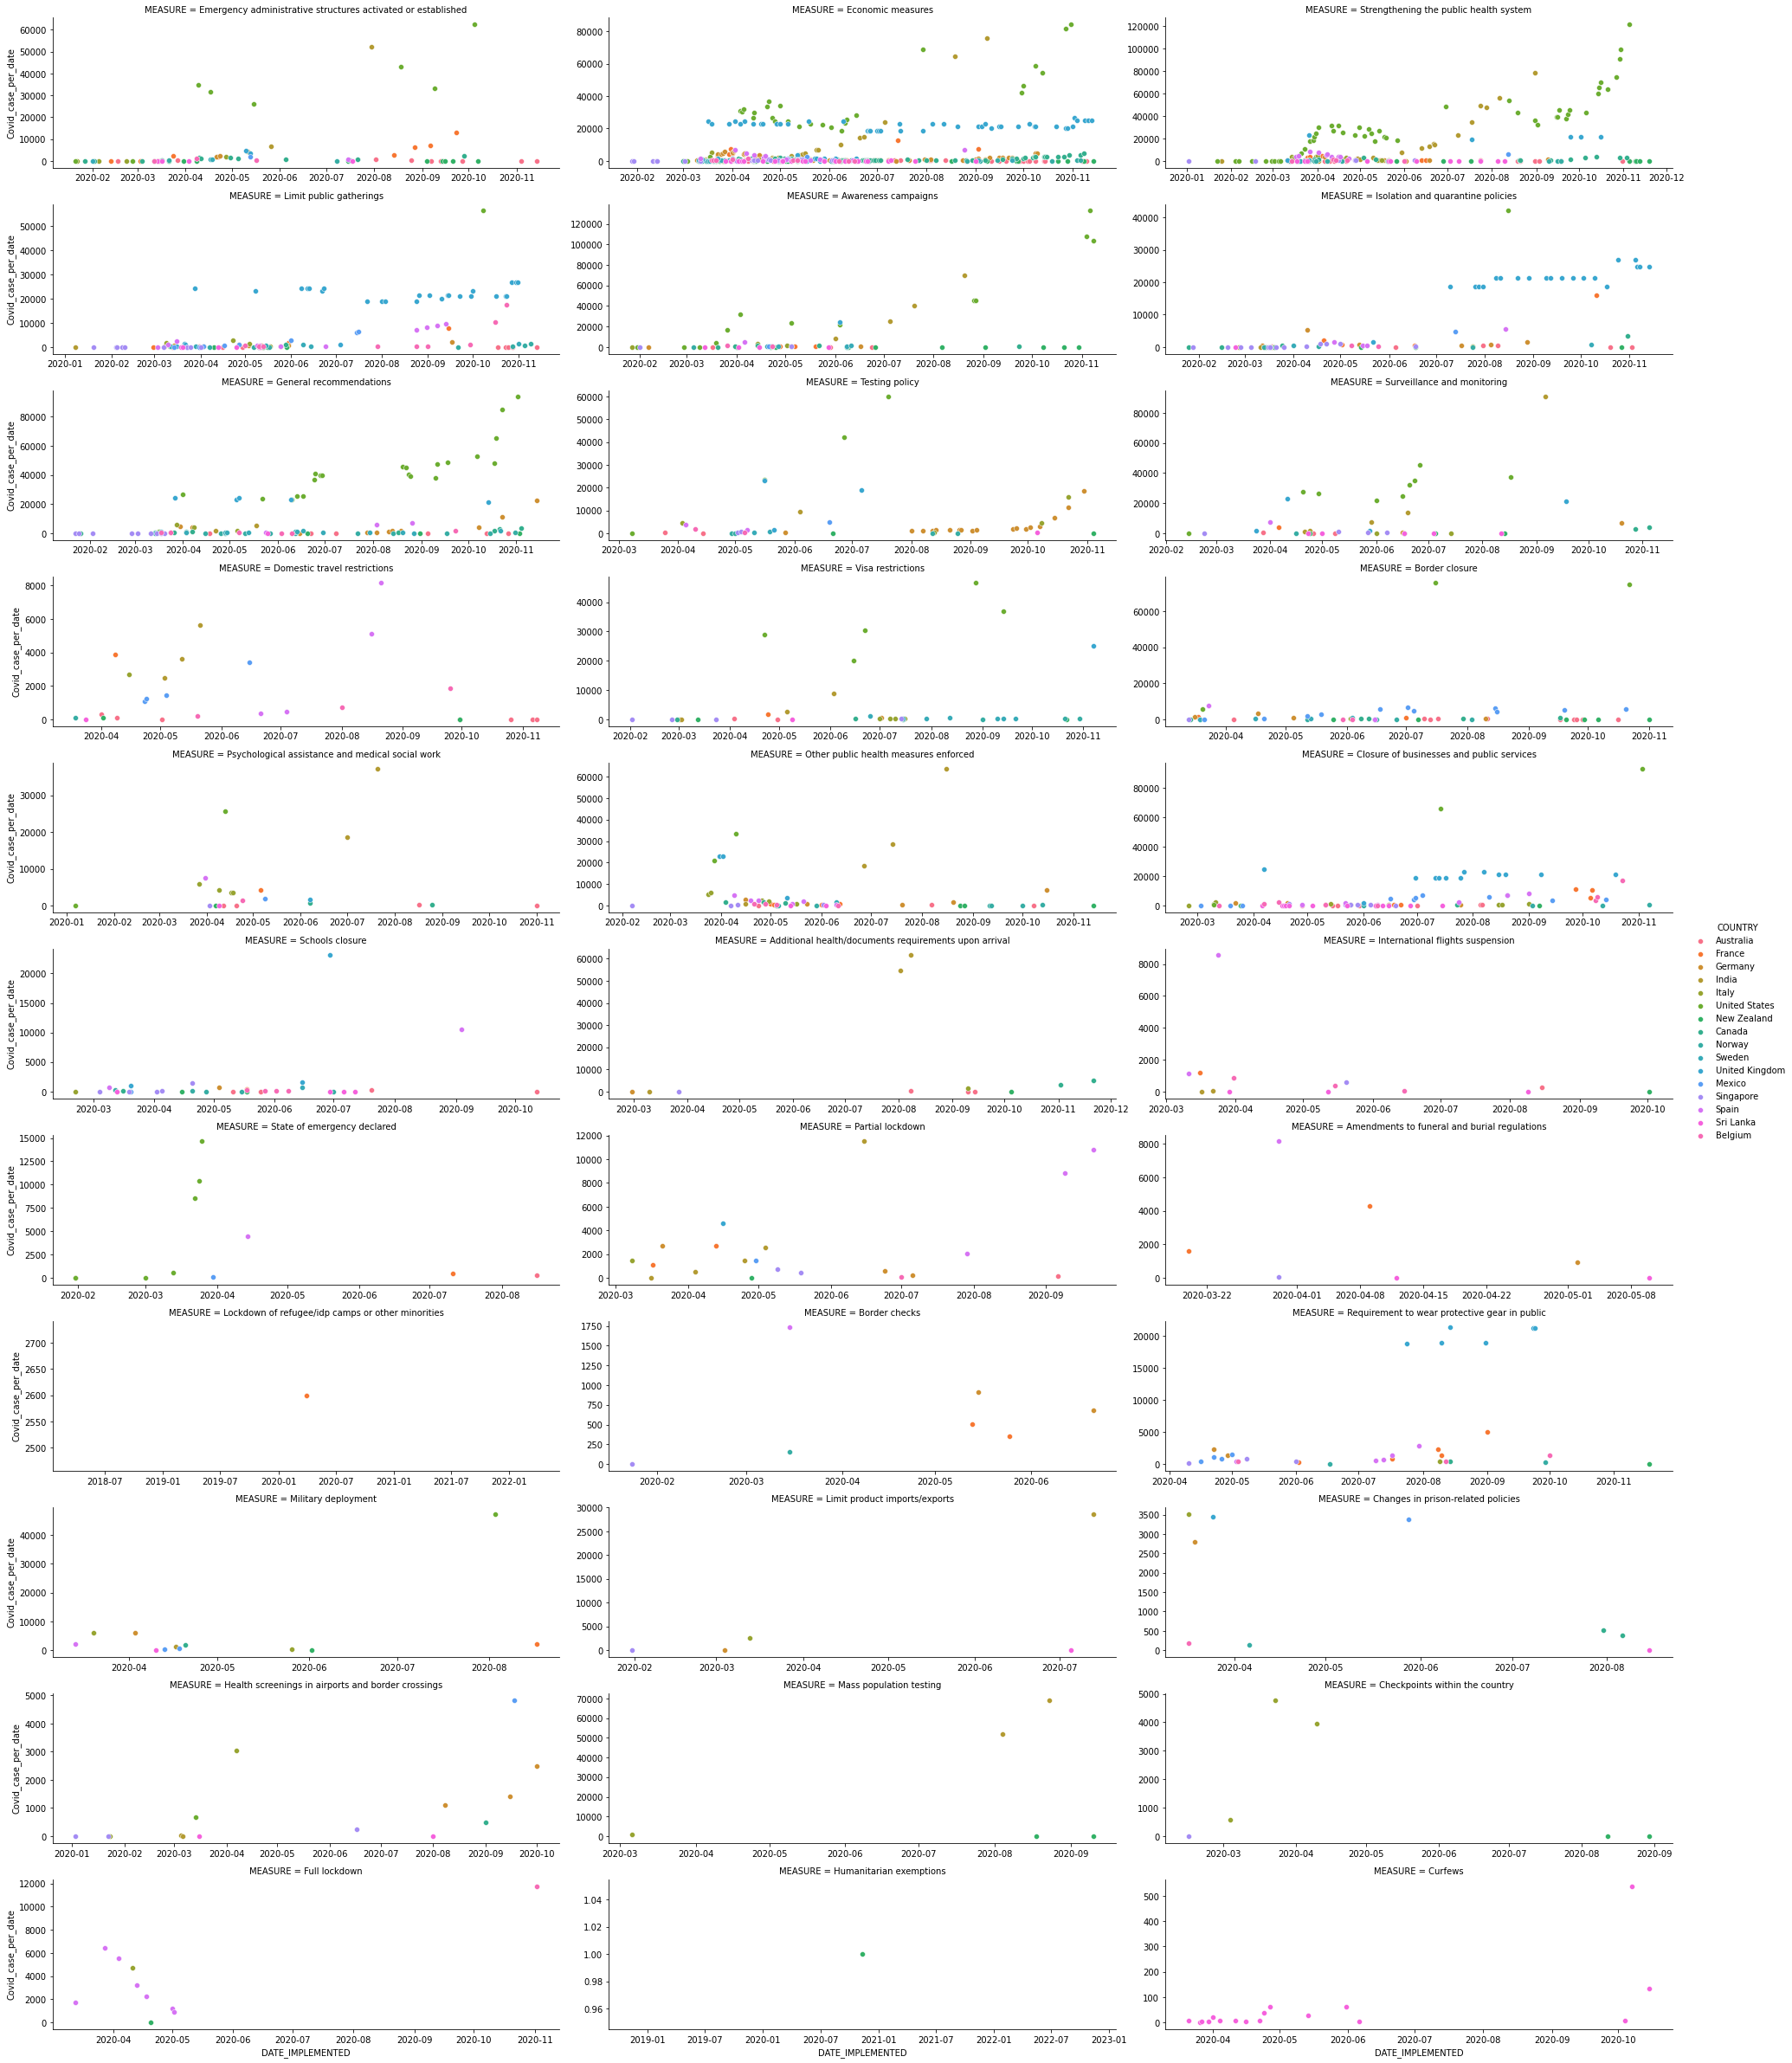

In [23]:
#Below are the scatterplots that show the impact of each measure on the number of Covid-19 cases in the different countries.
import seaborn as sns
plt.tight_layout()
g = sns.FacetGrid(df0, col="MEASURE", hue="COUNTRY", height=3, aspect=3, col_wrap=3, sharex = False, sharey = False)
g.map_dataframe(sns.scatterplot, x="DATE_IMPLEMENTED", y="covid_case_per_date")
g.set_axis_labels("DATE_IMPLEMENTED", "Covid_case_per_date")
g.add_legend()

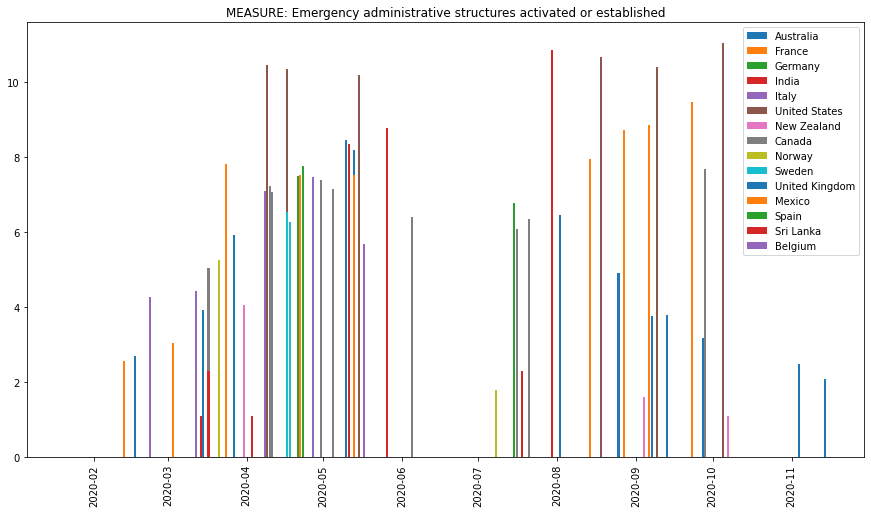

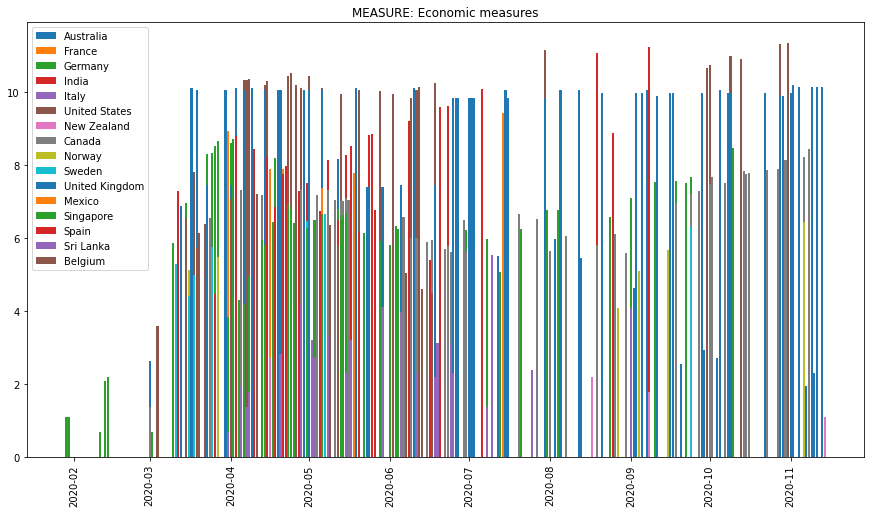

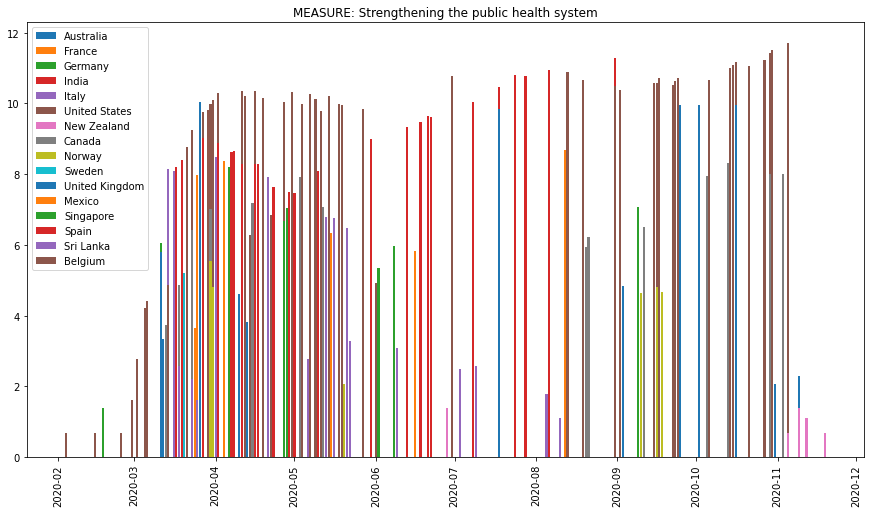

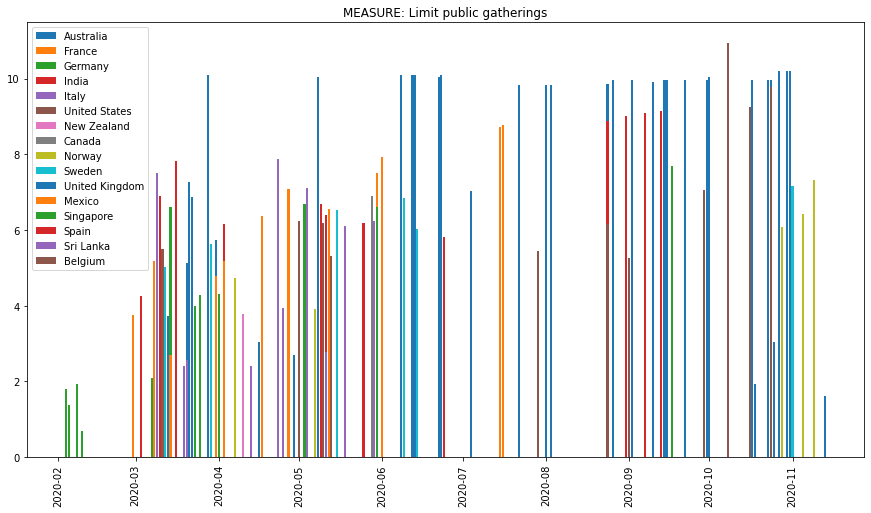

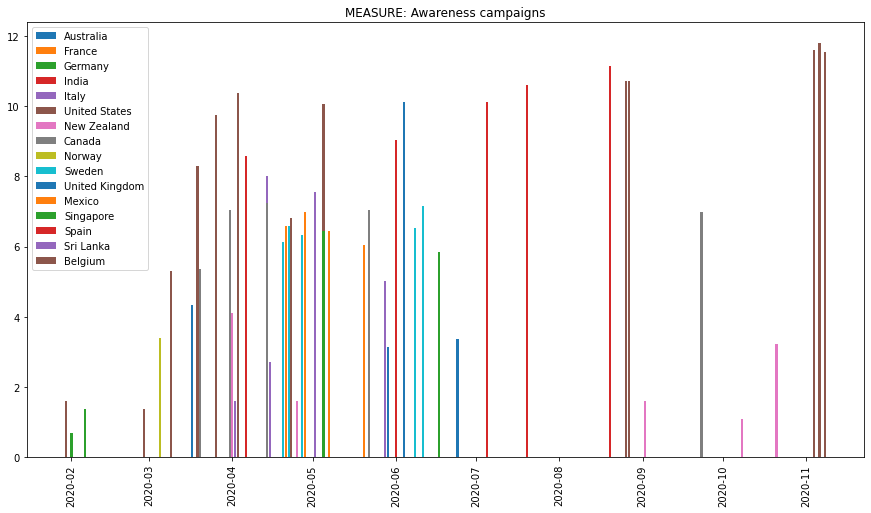

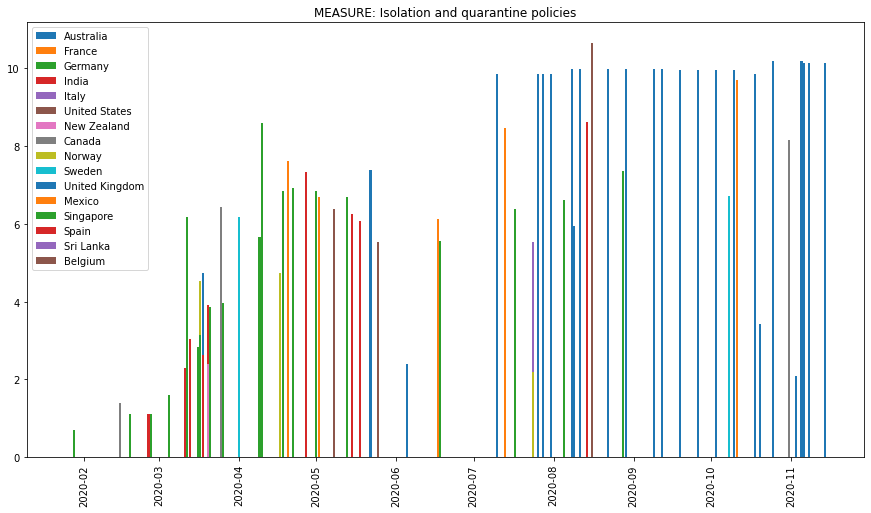

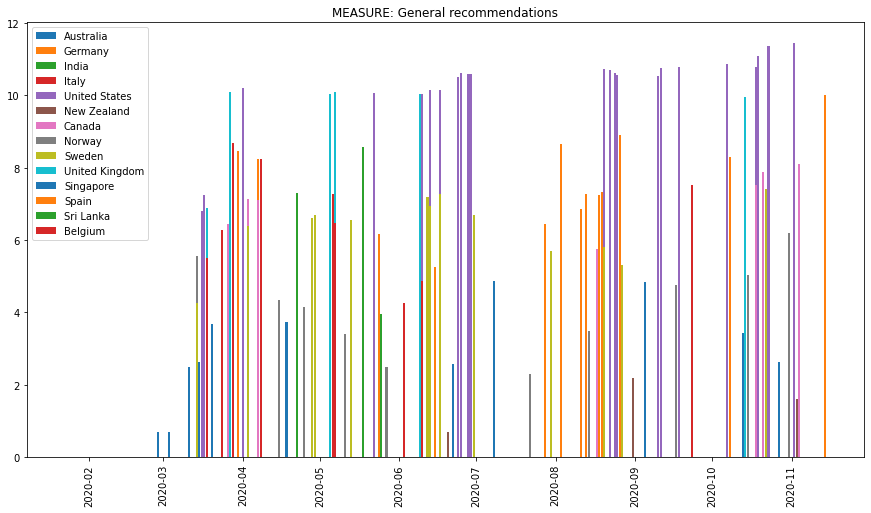

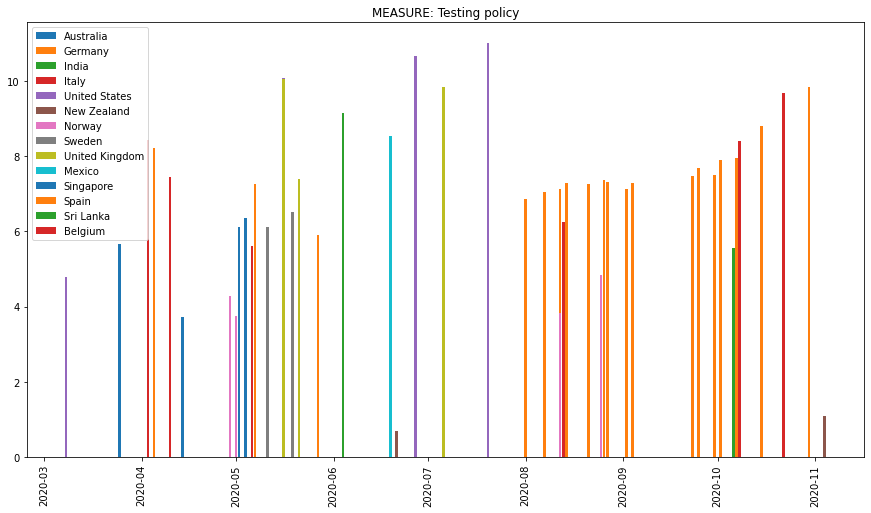

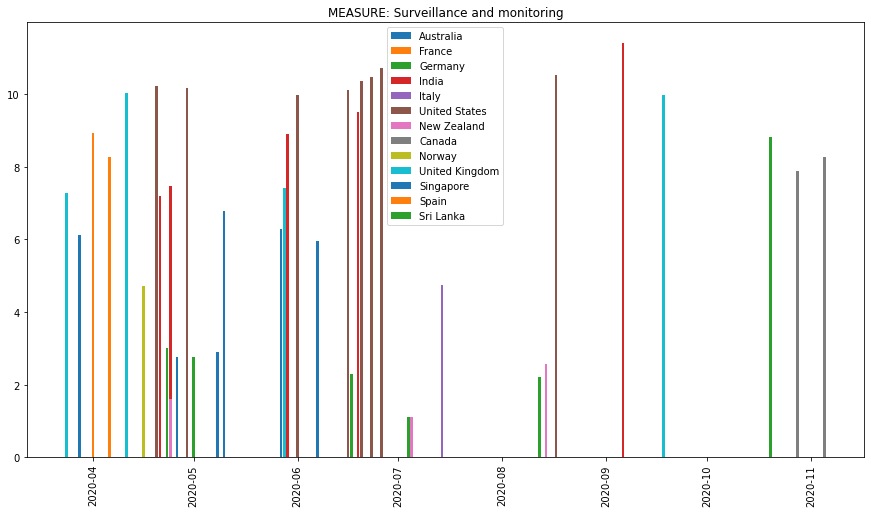

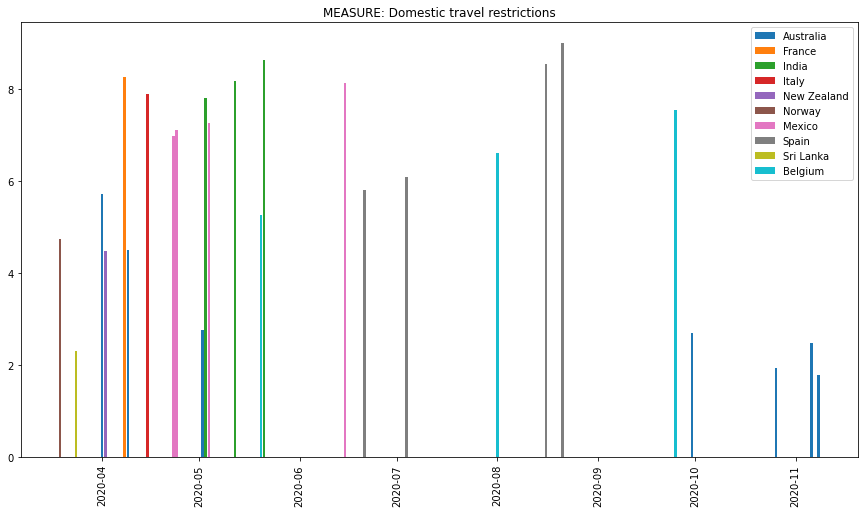

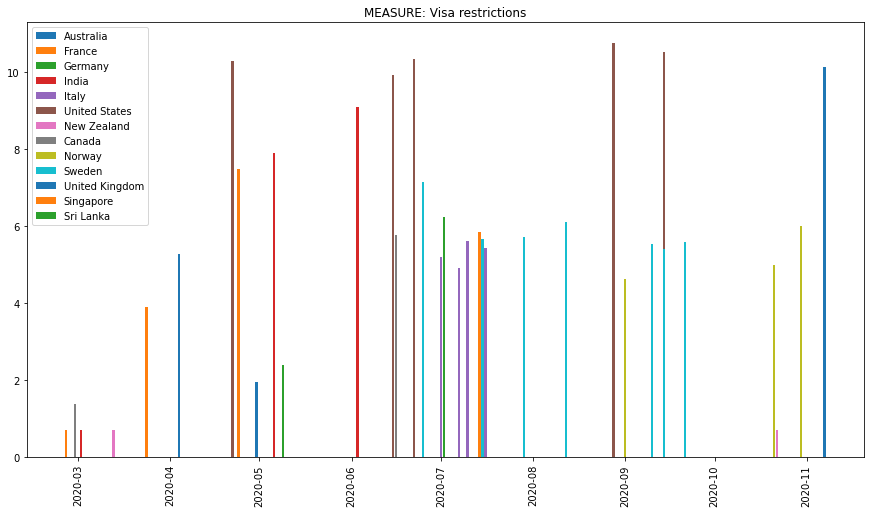

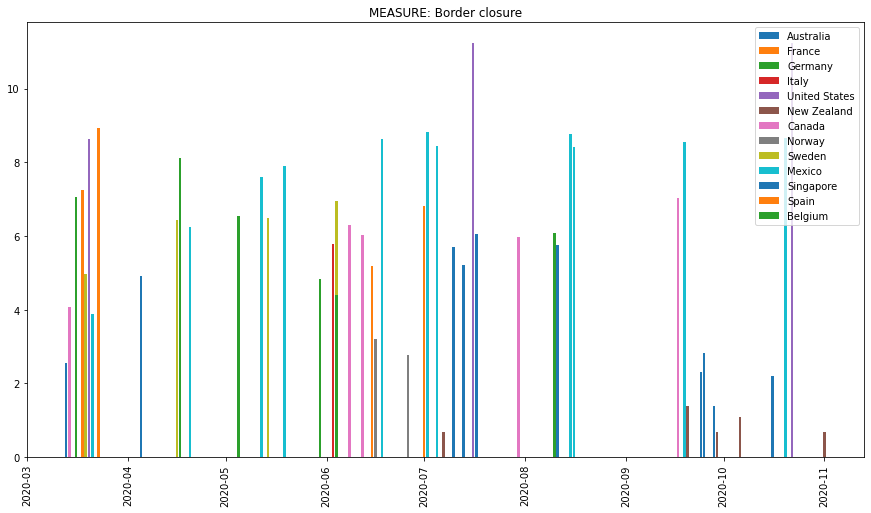

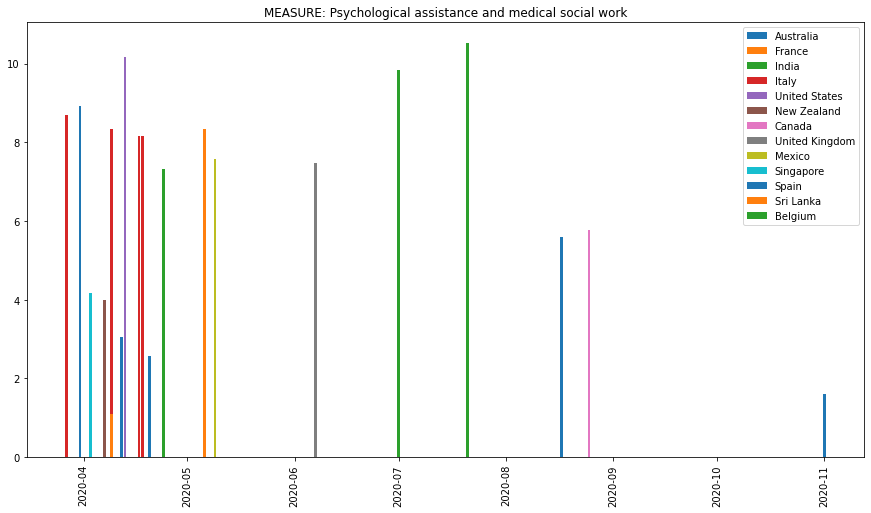

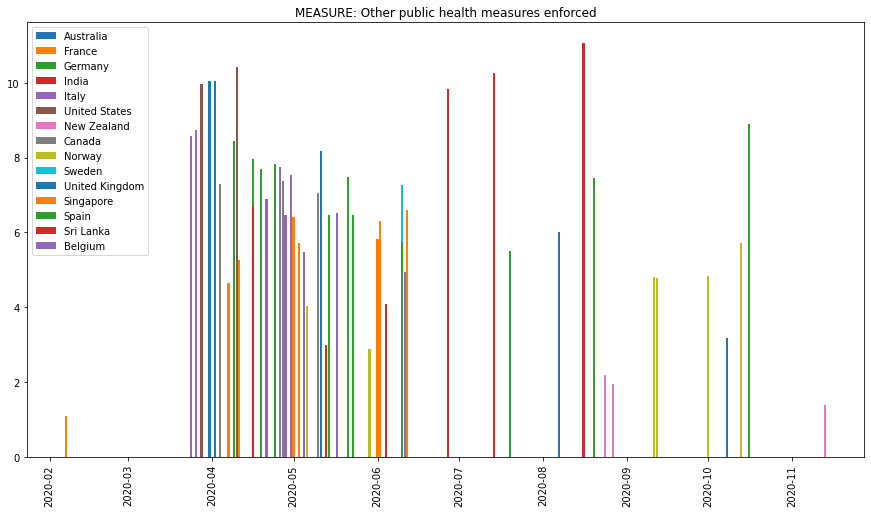

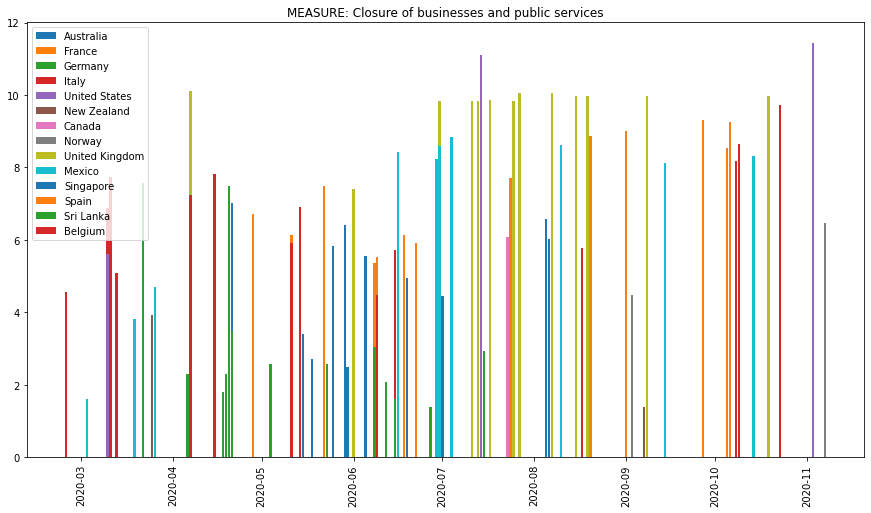

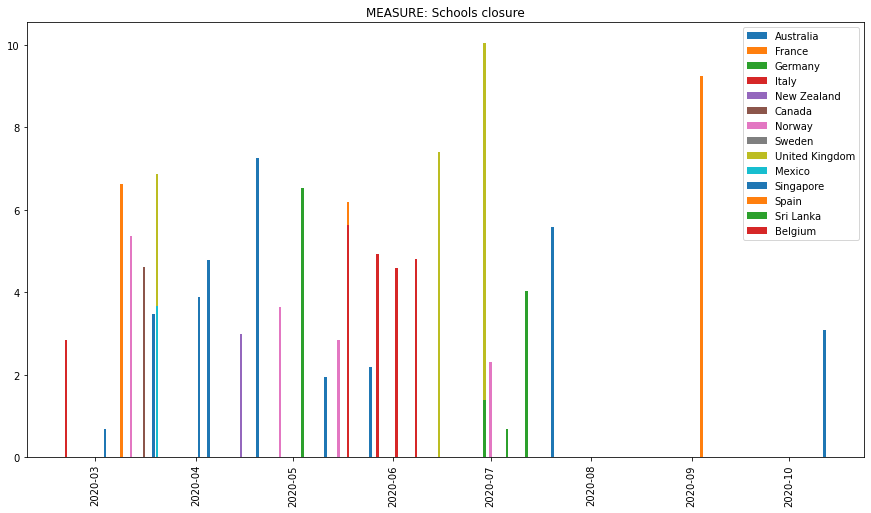

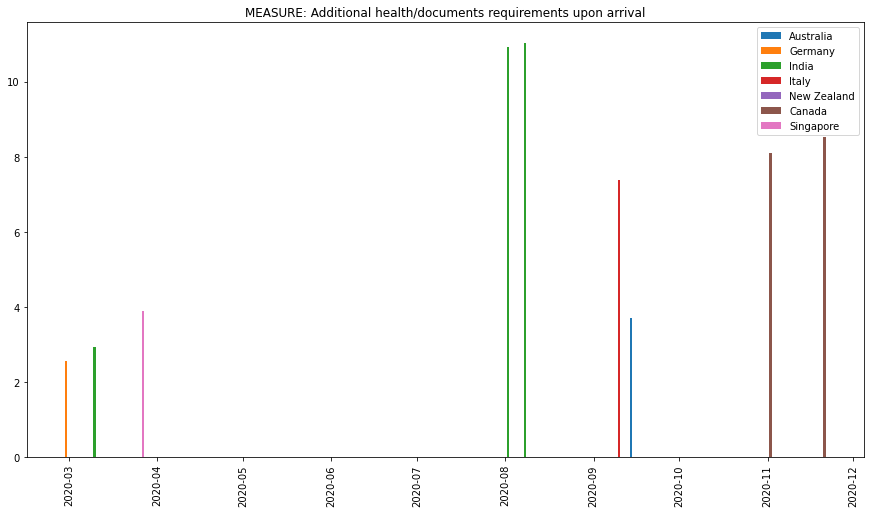

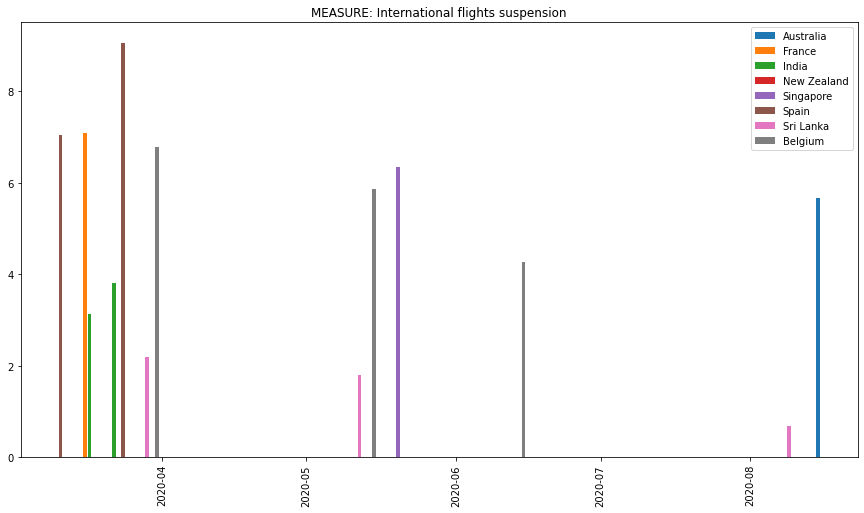

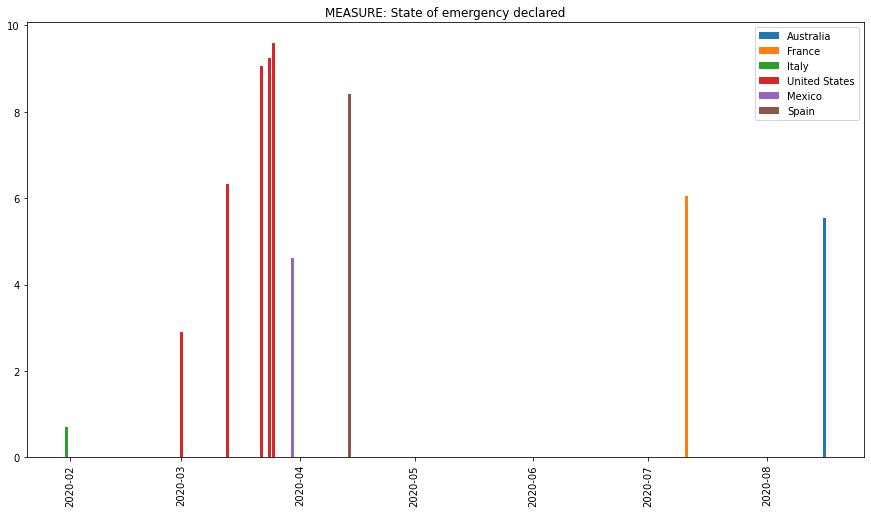

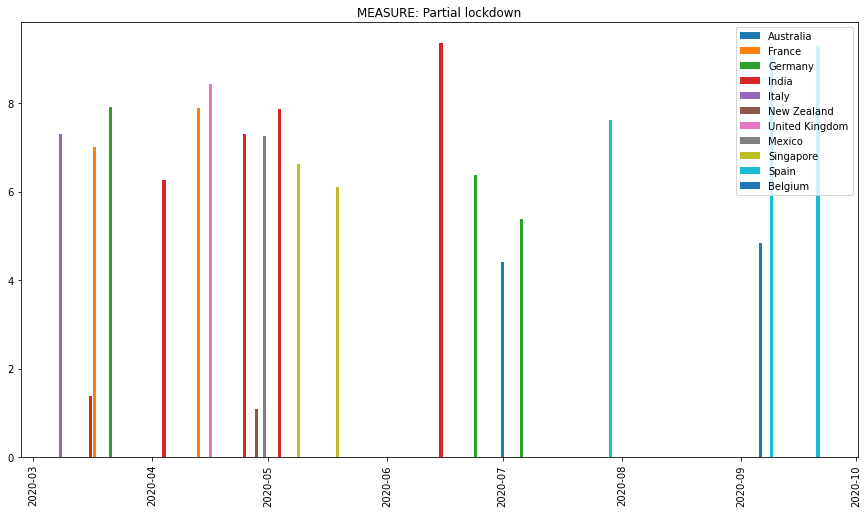

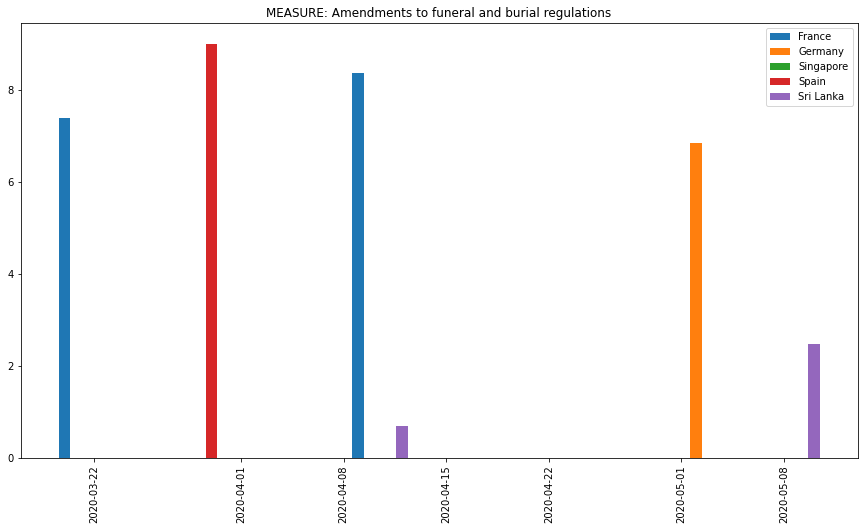

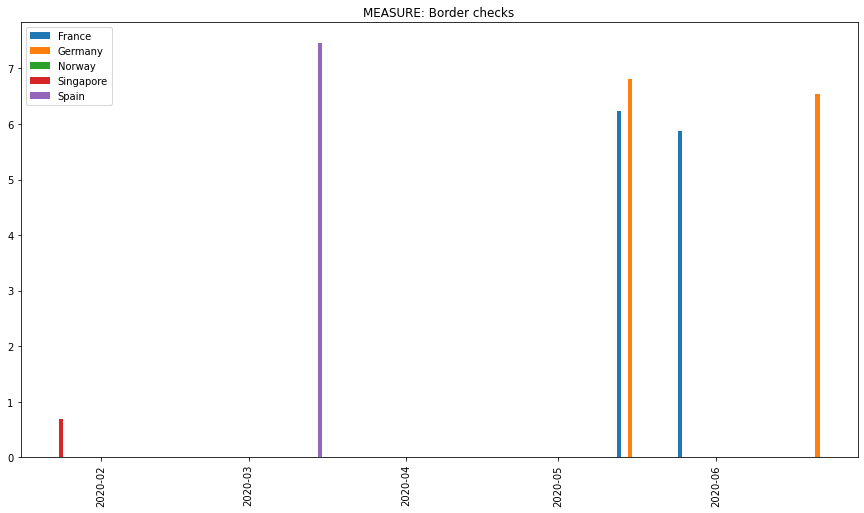

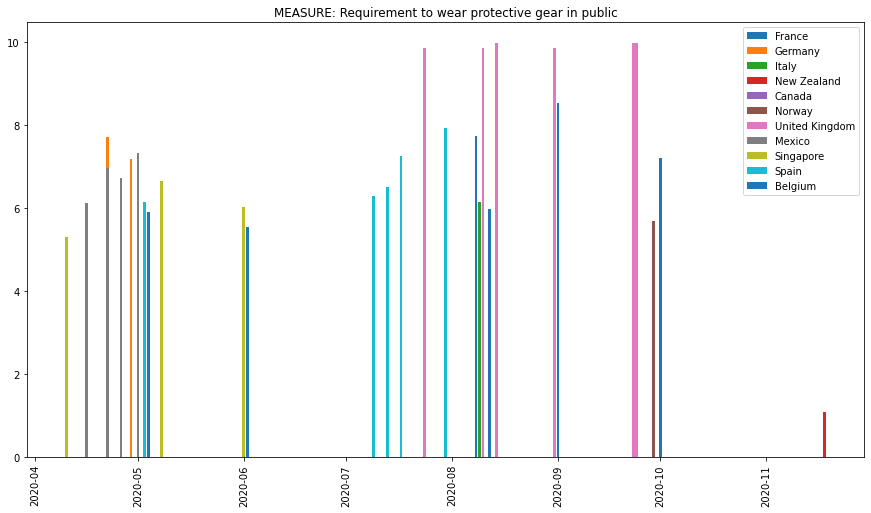

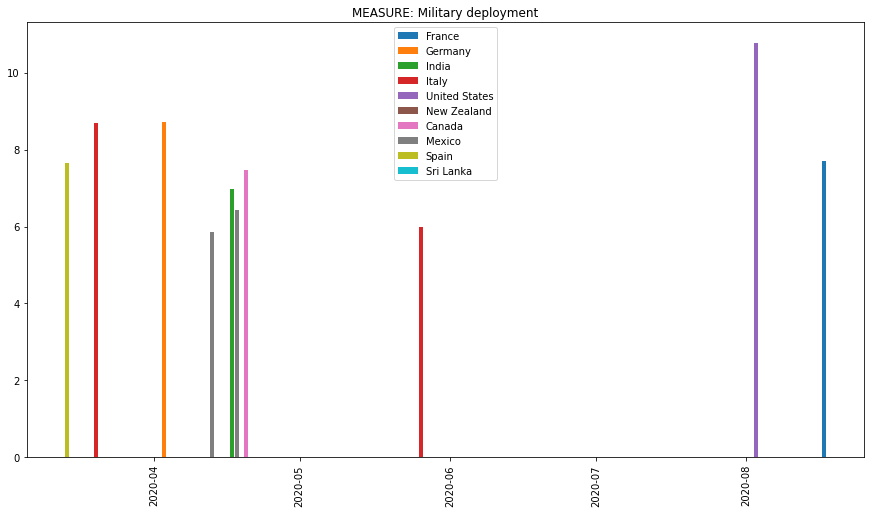

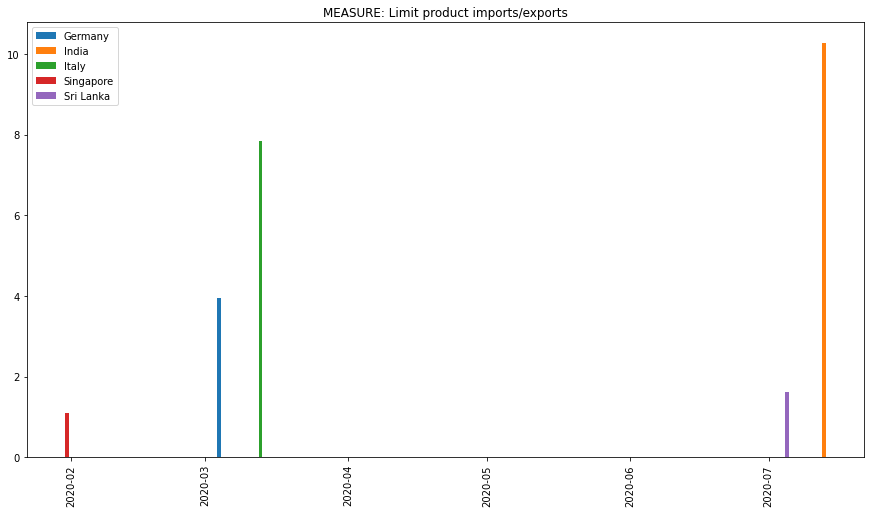

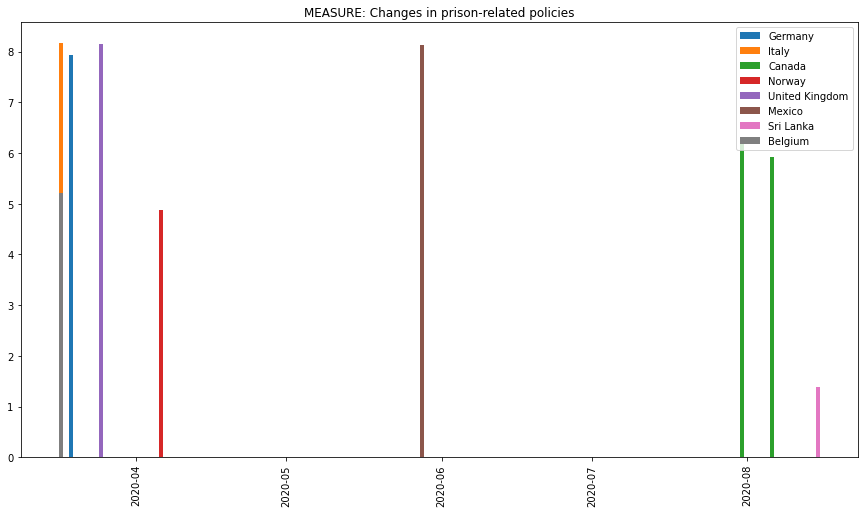

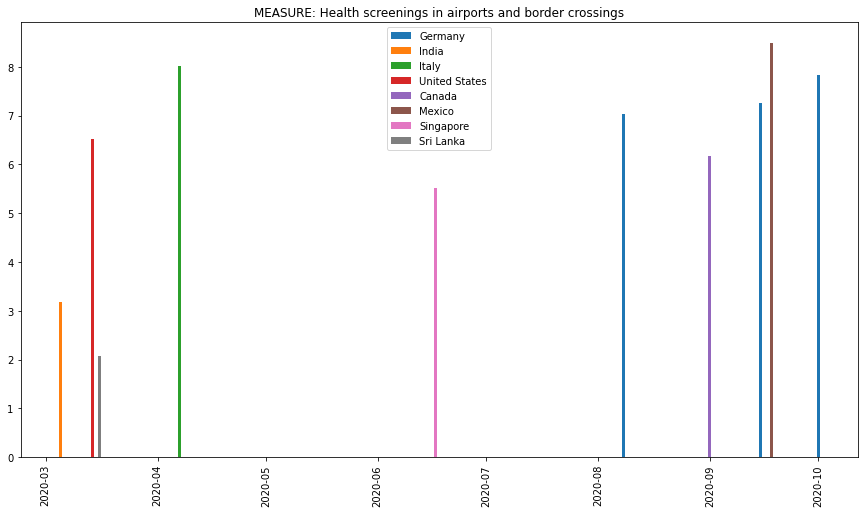

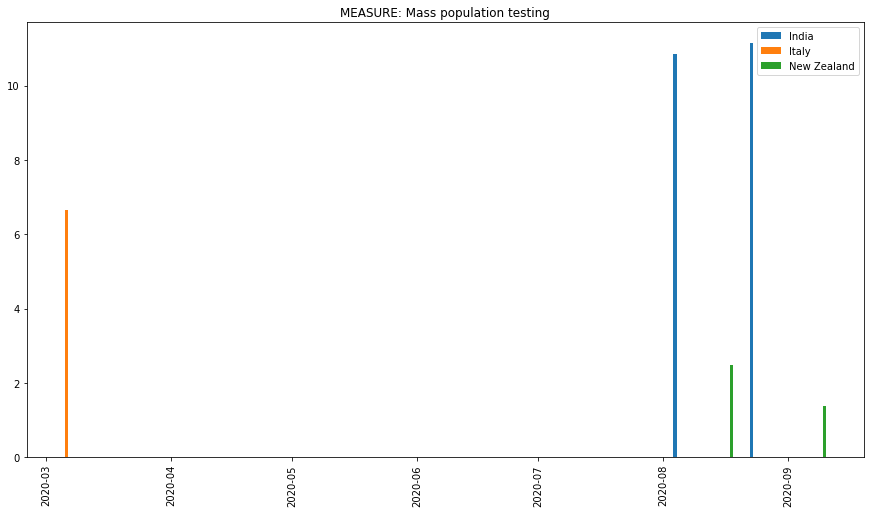

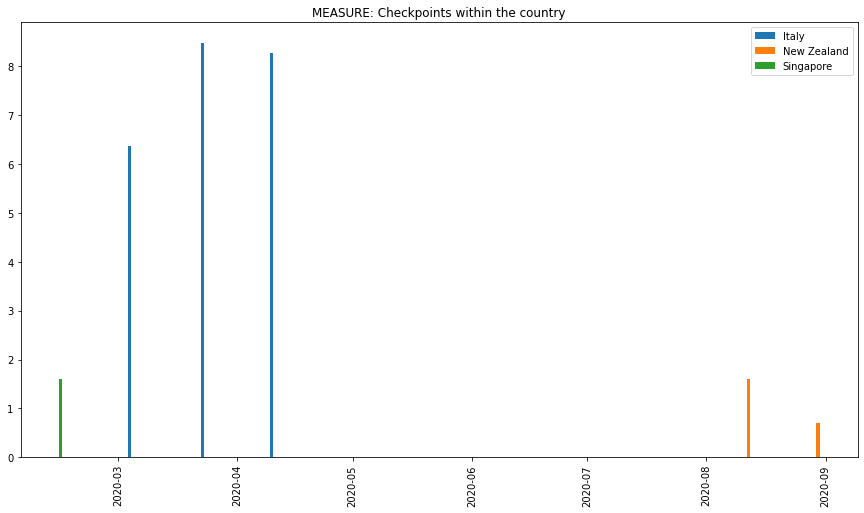

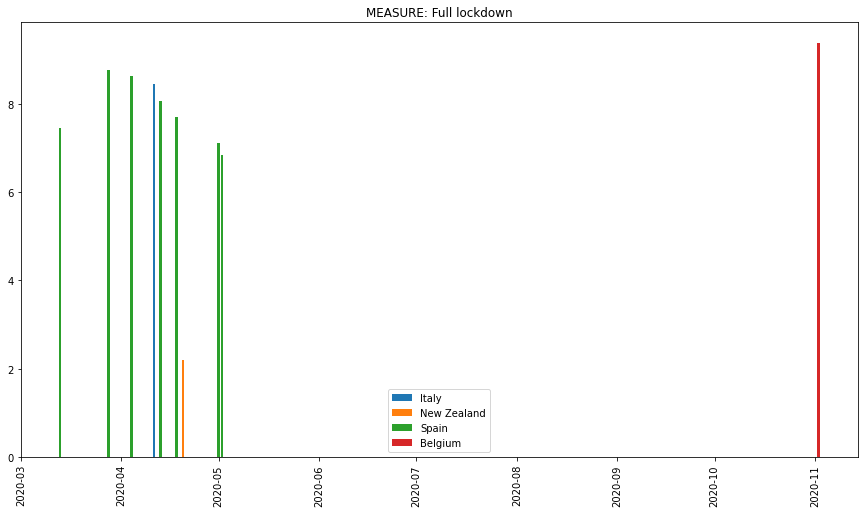

In [24]:
# These bar-graphs show the impact of each measure on the number of Covid-19 cases in the different countries.
# We have plotted the log-value of covid cases on the y-axis to normalize the values.
Measure_array=df0["MEASURE"].unique()
for i in range(len(Measure_array)):
    new_df = df0[df0['MEASURE'] == Measure_array[i]]
    Country_array=new_df["COUNTRY"].unique()
    if len(Country_array) > 1:
        plt.figure(figsize=(15,8))
        for j in range(len(Country_array)):
            df1 = df0[df0["MEASURE"]== Measure_array[i]]
            df1 = df1[df1["COUNTRY"] == Country_array[j]]
            if len(df1) > 0:
                plt.bar(df1['DATE_IMPLEMENTED'],df1['log_value'],label=Country_array[j])
                plt.xticks(rotation=90)
        plt.legend()
        title="MEASURE: "+Measure_array[i]
        plt.title(title)
        plt.show()

<font color='Green'>Determining the Countries with more than 15000 new Covid-19 cases in a day and the measures taken by them</font>

In [18]:
df0['max_covid_cases'] = np.where(df0['covid_case_per_date']>= 15000, True, False)
max_covid_cases_countries = df0[df0['max_covid_cases'] == True]
max_covid_cases_countries['MEASURE'].unique()

array(['Isolation and quarantine policies', 'Testing policy',
       'General recommendations',
       'Strengthening the public health system',
       'Other public health measures enforced',
       'Psychological assistance and medical social work',
       'Awareness campaigns', 'Economic measures',
       'Limit product imports/exports',
       'Emergency administrative structures activated or established',
       'Additional health/documents requirements upon arrival',
       'Mass population testing', 'Surveillance and monitoring',
       'Visa restrictions', 'Closure of businesses and public services',
       'Border closure', 'Military deployment', 'Limit public gatherings',
       'Schools closure', 'Requirement to wear protective gear in public'],
      dtype=object)

In [19]:
Measure_array = max_covid_cases_countries["MEASURE"].unique()
Measure_array

array(['Isolation and quarantine policies', 'Testing policy',
       'General recommendations',
       'Strengthening the public health system',
       'Other public health measures enforced',
       'Psychological assistance and medical social work',
       'Awareness campaigns', 'Economic measures',
       'Limit product imports/exports',
       'Emergency administrative structures activated or established',
       'Additional health/documents requirements upon arrival',
       'Mass population testing', 'Surveillance and monitoring',
       'Visa restrictions', 'Closure of businesses and public services',
       'Border closure', 'Military deployment', 'Limit public gatherings',
       'Schools closure', 'Requirement to wear protective gear in public'],
      dtype=object)

<font color='Green'><b>3) Countries with maximum Covid-19 cases, the measures taken by them and the impact of those measures</b></font>

In [20]:
# Below graphs show the countries with maximum Covid-19 cases, the measures taken by them and the impact of those measures
# On hovering over the graph, we can see the number of new covid cases on a particular day.
Measure_array = max_covid_cases_countries["MEASURE"].unique()
mapper_color=['red','blue','olive','green','black','purple','maroon']


for i in range(len(Measure_array)):
    p = figure(plot_width=800, plot_height=400, x_axis_type="datetime",toolbar_location=None)
    p.title.text = "MEASURE "+Measure_array[i]  
    new_df = max_covid_cases_countries[max_covid_cases_countries['MEASURE'] == Measure_array[i]]
    Country_array = new_df["COUNTRY"].unique() 
    if len(Country_array) > 1:
        for j in range(len(Country_array)):
            df1 = df[df["MEASURE"]== Measure_array[i]]
            df1 = df1[df1["COUNTRY"] == Country_array[j]]
            df1 = df1.drop_duplicates(subset=['DATE_IMPLEMENTED'])
            df1 = df1.sort_values(by="DATE_IMPLEMENTED")
            source = ColumnDataSource(data=dict(
                x=df1['DATE_IMPLEMENTED'],
                y=df1['covid_case_per_date'],
                desc=df1['covid_case_per_date']
                ))
            p.line('x','y', line_width=2, alpha=0.8, 
                   legend_label=Country_array[j],source=source,color=mapper_color[j])
            p.add_tools(HoverTool(tooltips='@desc'))
        show(p)
        p.legend.location = "top_left"
        p.legend.click_policy="hide"

<font color='Green'><b> 4) Which countries took the maximum amount of measures?</b></font>

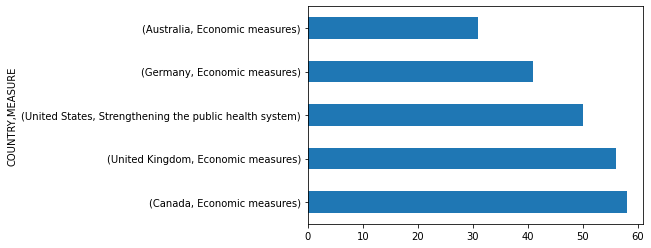

In [28]:
#Countries that took maximum amount of measures
sorting=df0.groupby(['COUNTRY','MEASURE']).size()
sorting.sort_values(inplace=True, ascending=False)
countries_max_measures = sorting.head()
countries_max_measures
countries_max_measures.plot.barh(stacked=True)

<font color='Green'><b> 5) Which countries opted for a complete lockdown?</b></font>

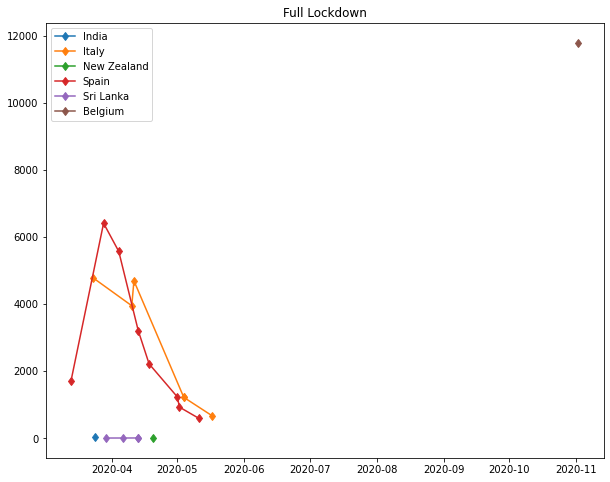

In [29]:
#Countries that opted for a complete lockdown
comp_lockdown=df.loc[df['MEASURE'] == 'Full lockdown']
full_country_array = comp_lockdown.COUNTRY.unique()
plt.figure(figsize=(10,8))
for i in range(len(full_country_array)):
    country_df = comp_lockdown[comp_lockdown["COUNTRY"] == full_country_array[i]]
    plt.plot(country_df['DATE_IMPLEMENTED'],country_df['covid_case_per_date'],marker="d",label=full_country_array[i])
    plt.legend()
    title="Full Lockdown"
    plt.title(title)
plt.show()

<font color='Green'><b> 6) What is the distribution of covid cases across the different measures taken by different countries?</b></font>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


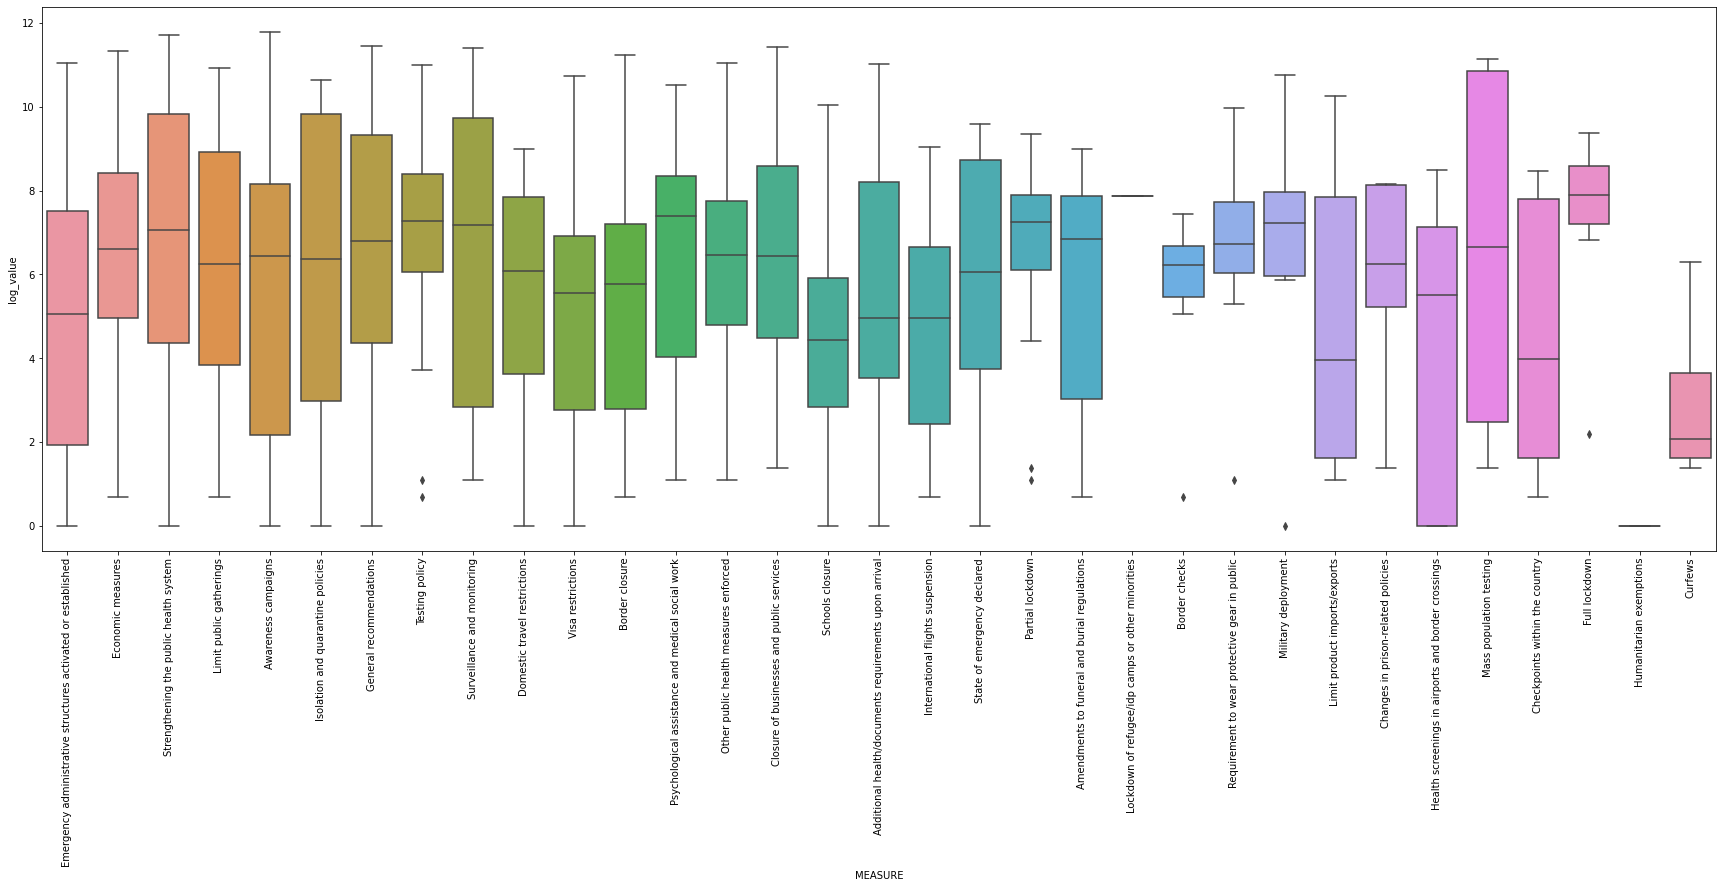

In [31]:
#This is the boxplot of measures vs the log-value of number of Covid-cases
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.set_theme(style="whitegrid")
sns.boxplot(df0['MEASURE'],df0['log_value'])

<font color='Green'><b> 7) What is the distribution of measures taken by different countries?</b></font>

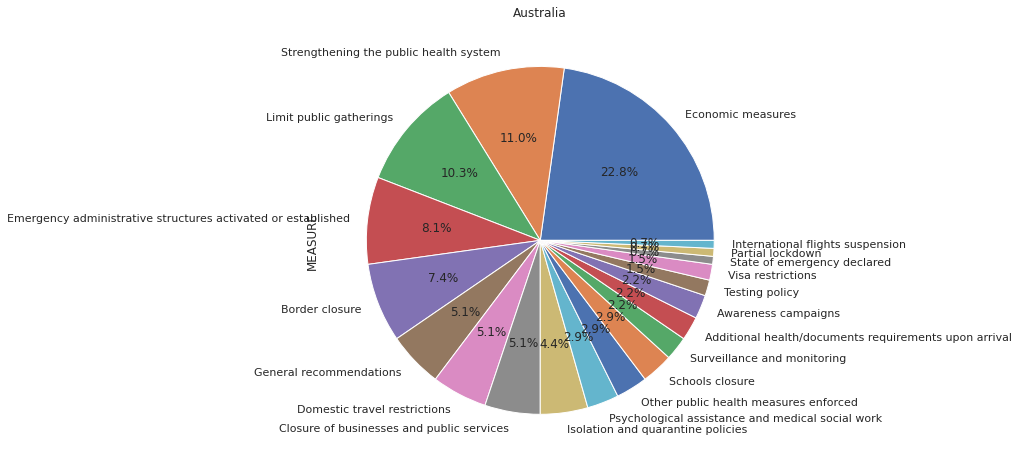

--------------------------------------------------------------------------------------------------------------


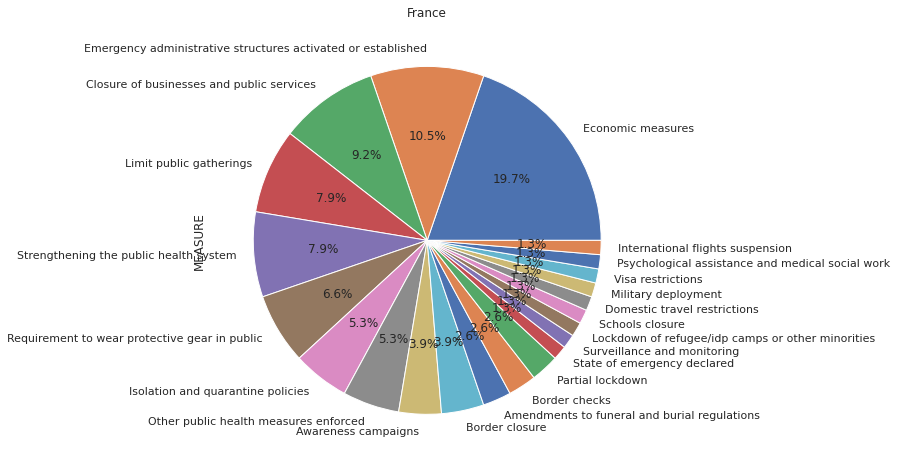

--------------------------------------------------------------------------------------------------------------


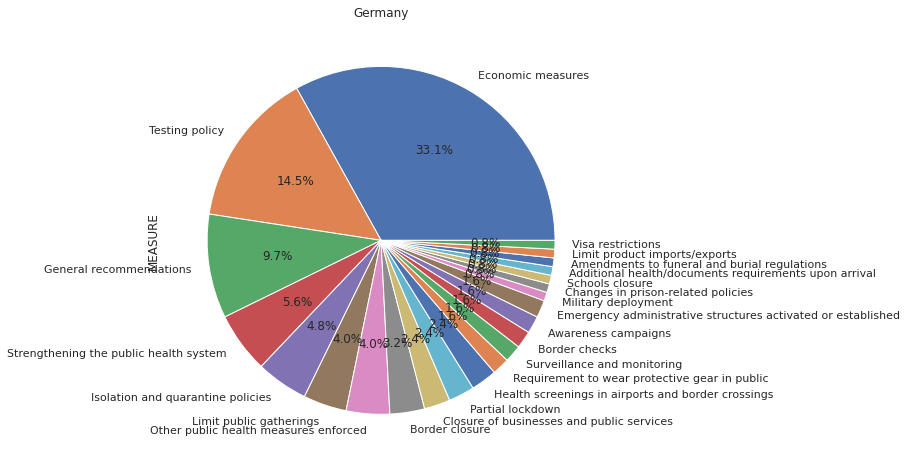

--------------------------------------------------------------------------------------------------------------


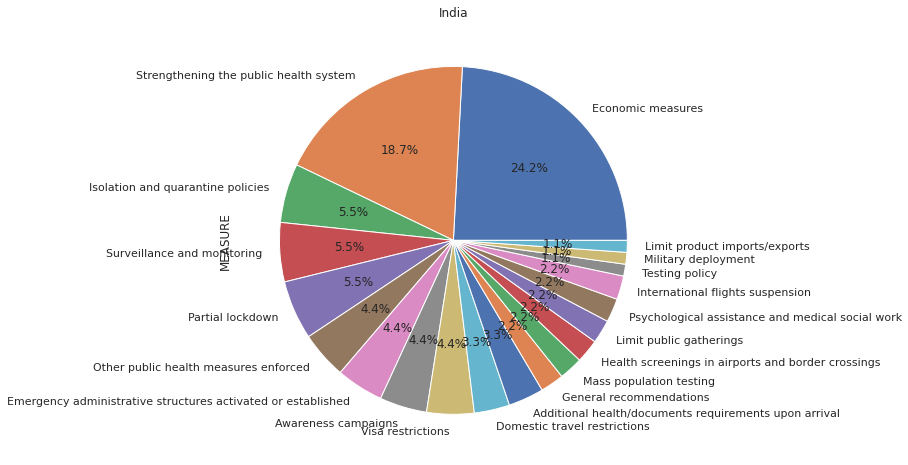

--------------------------------------------------------------------------------------------------------------


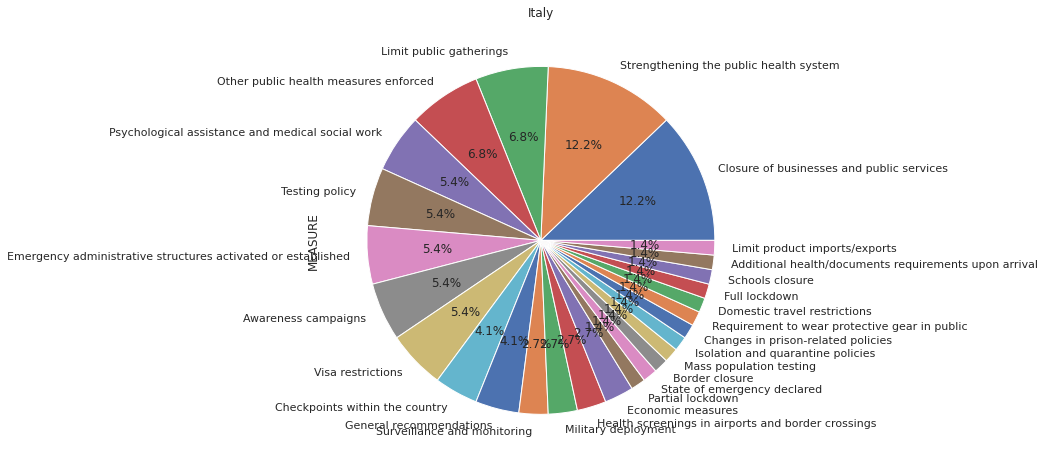

--------------------------------------------------------------------------------------------------------------


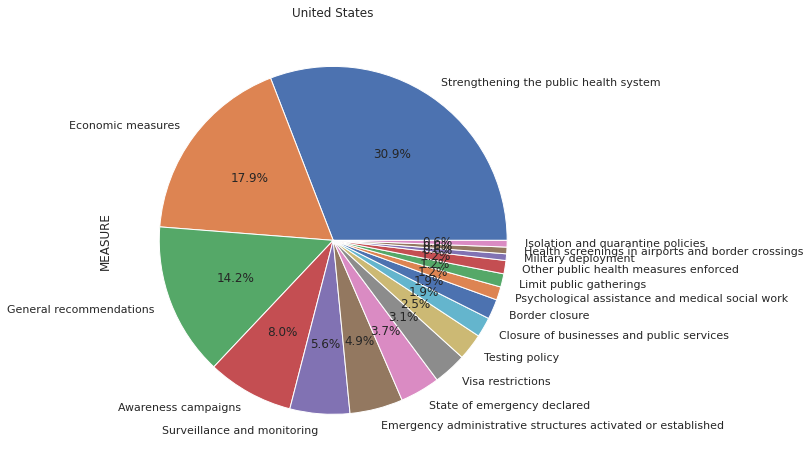

--------------------------------------------------------------------------------------------------------------


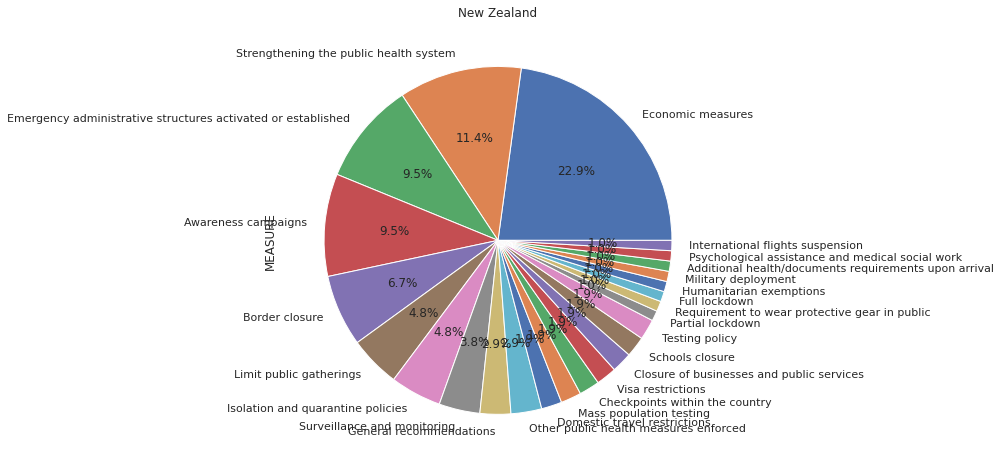

--------------------------------------------------------------------------------------------------------------


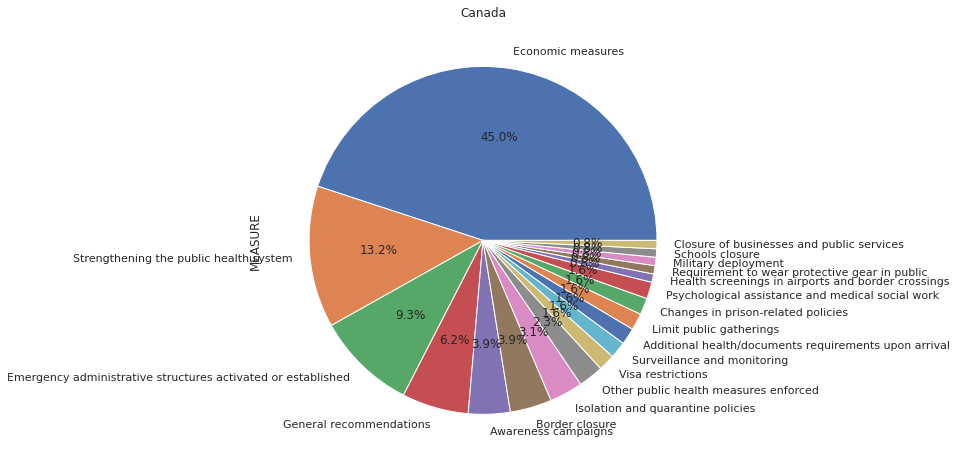

--------------------------------------------------------------------------------------------------------------


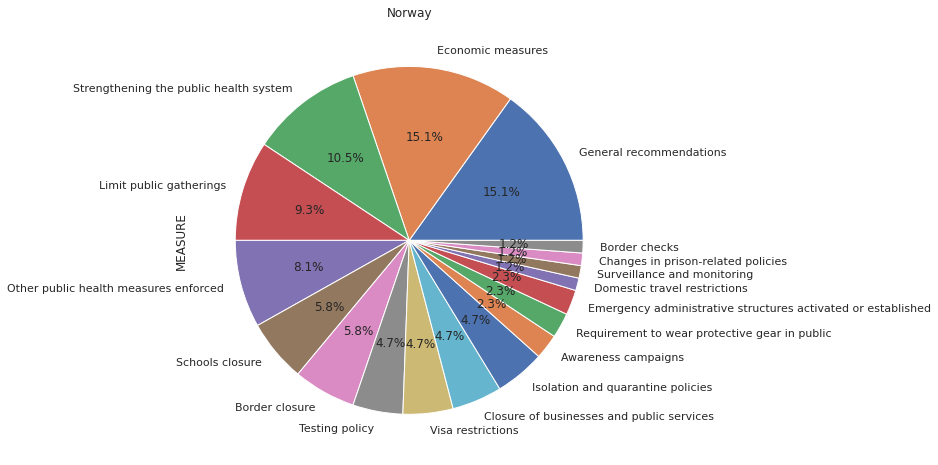

--------------------------------------------------------------------------------------------------------------


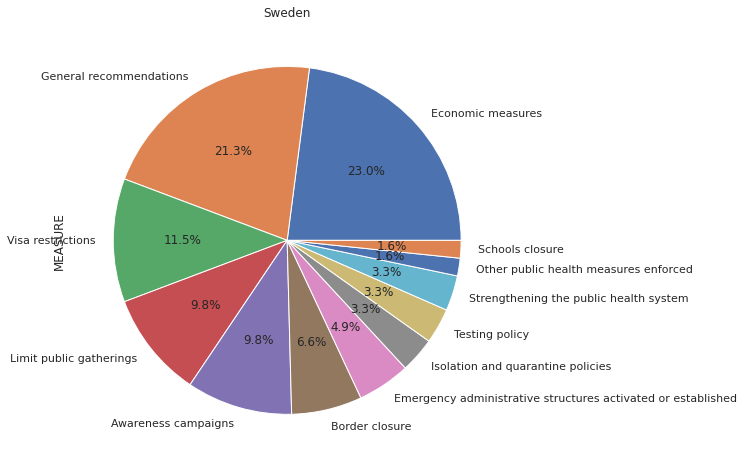

--------------------------------------------------------------------------------------------------------------


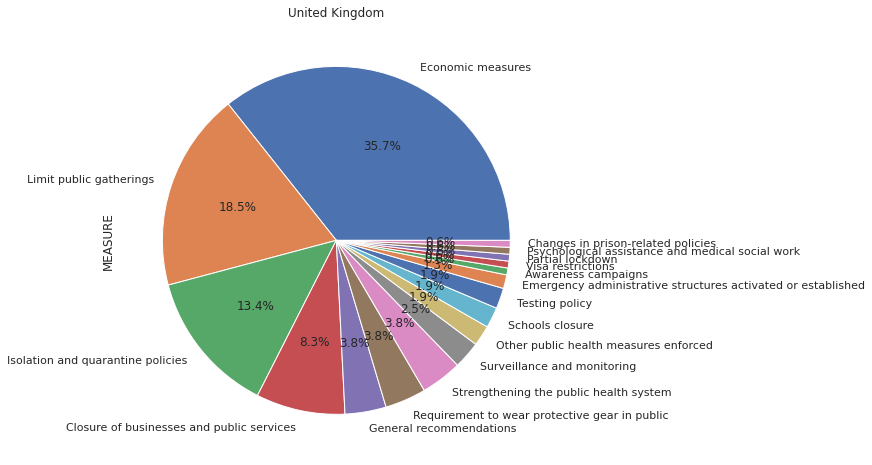

--------------------------------------------------------------------------------------------------------------


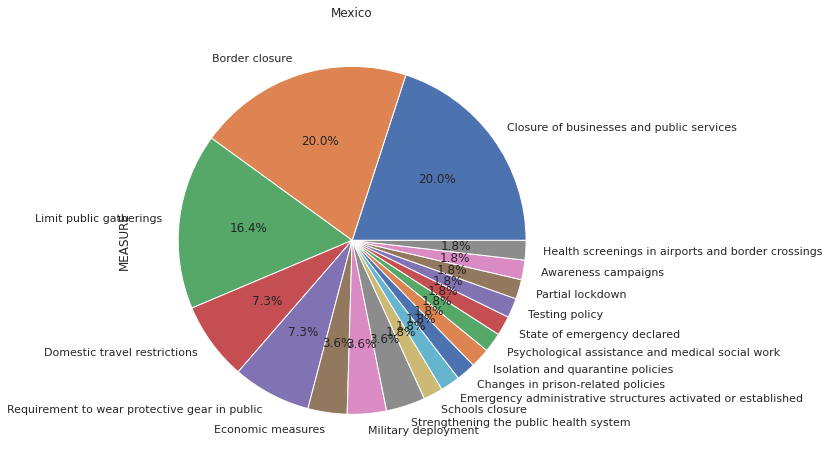

--------------------------------------------------------------------------------------------------------------


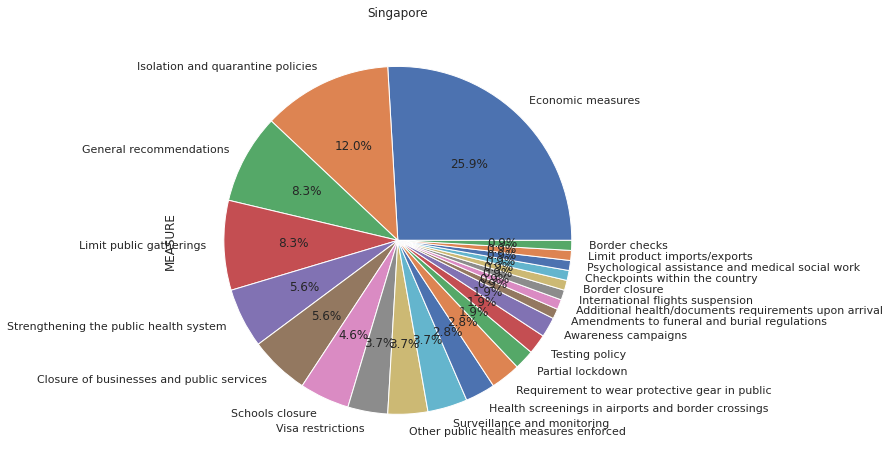

--------------------------------------------------------------------------------------------------------------


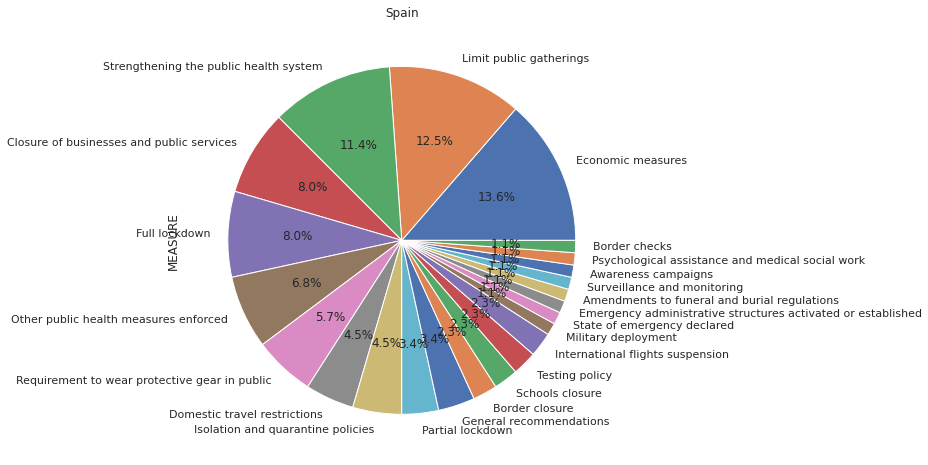

--------------------------------------------------------------------------------------------------------------


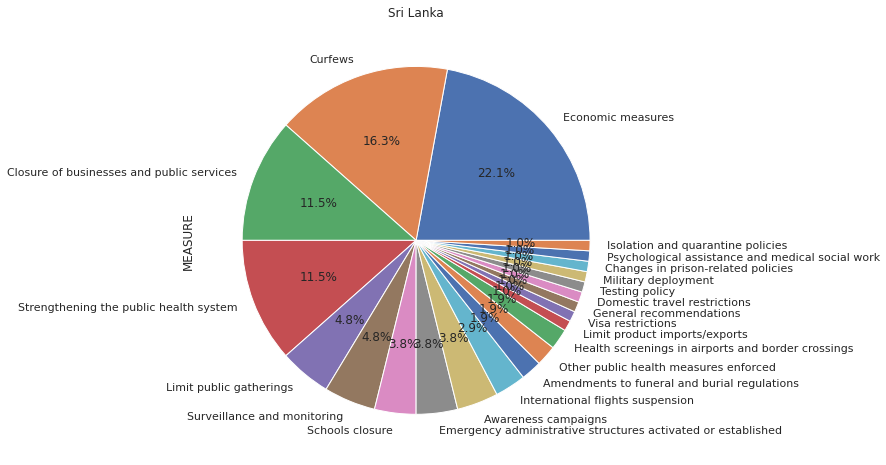

--------------------------------------------------------------------------------------------------------------


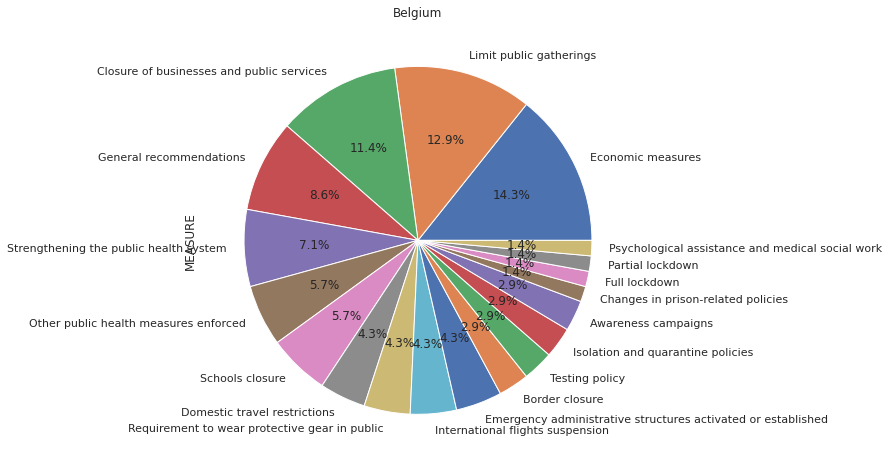

--------------------------------------------------------------------------------------------------------------


In [32]:
# These pie-charts show amount of different measures taken by different countries
country_array = df0['COUNTRY'].unique()
for i in range(len(country_array)):
    countries = df0[df0['COUNTRY'] == country_array[i]]
    plt.figure(figsize=(8,8))
    countries['MEASURE'].value_counts().plot.pie(autopct="%1.1f%%")
    plt.title(country_array[i])
    plt.show()
    print("--------------------------------------------------------------------------------------------------------------")

In [ ]:
print(df0.groupby('COUNTRY').size())

COUNTRY
Australia         136
Belgium            70
Canada            129
France             76
Germany           124
India              91
Italy              74
Mexico             55
New Zealand       105
Norway             86
Singapore         108
Spain              88
Sri Lanka         104
Sweden             61
United Kingdom    157
United States     162
dtype: int64


<font color='Green'><b> 8) What is the count of different measures taken by each countries?</b></font>

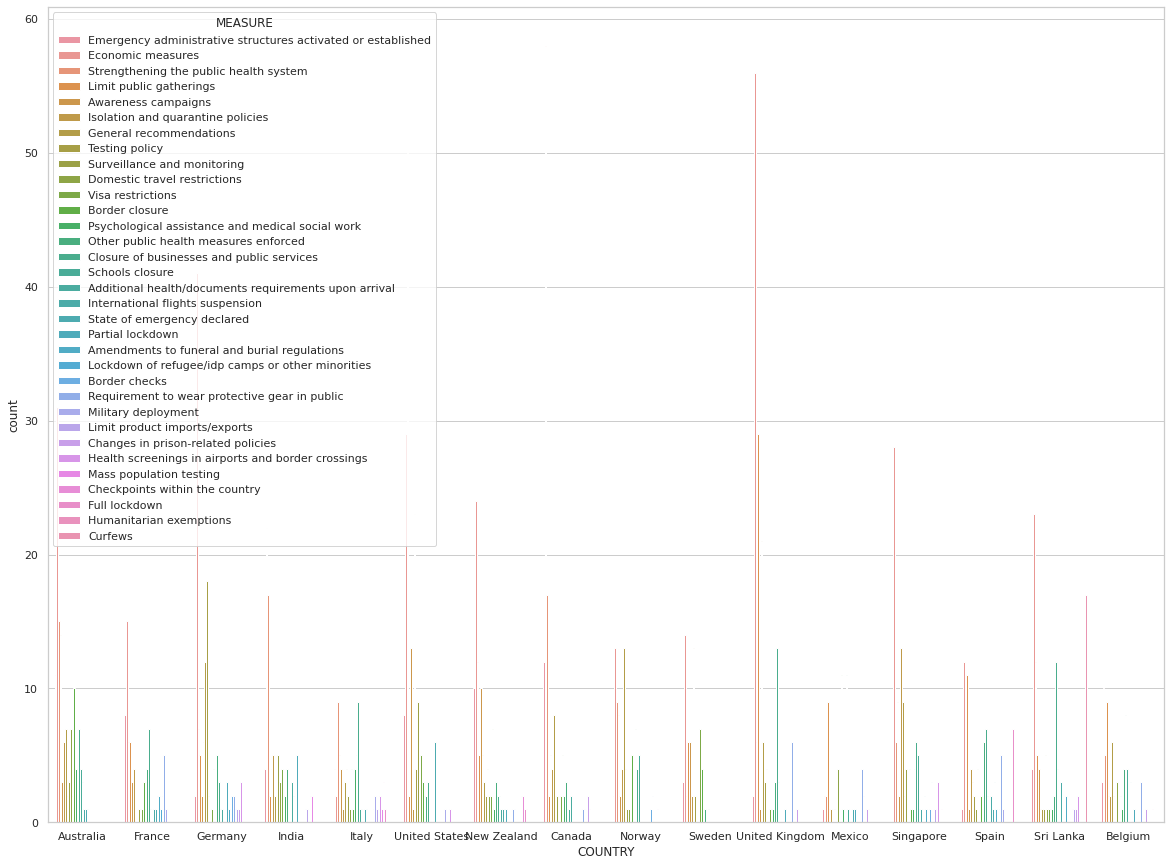

In [33]:
#This count plot shows the count of different measures taken by each country
plt.figure(figsize=(20,15))
sns.countplot(x='COUNTRY', hue='MEASURE', data=df0)
